In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train.astype('float32'), x_test.astype('float32')

x_train, x_test = x_train.reshape([-1,784]), x_test.reshape([-1,784])

x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
learning_rate = 0.02
training_epochs = 50
batch_size = 256
display_step = 1
examples_to_show = 10
input_size = 784
hidden1_size = 256
hidden2_size = 128

In [4]:
train_data = tf.data.Dataset.from_tensor_slices(x_train)
train_data = train_data.shuffle(60000).batch(batch_size)

In [5]:
def random_normal_intializer_with_stddev_1():
  return tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0, seed=None)

In [6]:
class AutoEncoder(tf.keras.Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    # 인코딩(Encoding) - 784 -> 256 -> 128
    self.hidden_layer_1 = tf.keras.layers.Dense(hidden1_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())
    self.hidden_layer_2 = tf.keras.layers.Dense(hidden2_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())
    # 디코딩(Decoding) 128 -> 256 -> 784
    self.hidden_layer_3 = tf.keras.layers.Dense(hidden1_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())
    self.output_layer = tf.keras.layers.Dense(input_size,
                                                activation='sigmoid',
                                                kernel_initializer=random_normal_intializer_with_stddev_1(),
                                                bias_initializer=random_normal_intializer_with_stddev_1())

  def call(self, x):
    H1_output = self.hidden_layer_1(x)
    H2_output = self.hidden_layer_2(H1_output)
    H3_output = self.hidden_layer_3(H2_output)
    reconstructed_x = self.output_layer(H3_output)

    return reconstructed_x

In [7]:
@tf.function
def mse_loss(y_pred, y_true):
  return tf.reduce_mean(tf.pow(y_true - y_pred, 2))

optimizer = tf.optimizers.RMSprop(learning_rate)

In [8]:
@tf.function
def train_step(model, x):
  y_true = x
  with tf.GradientTape() as tape:
    y_pred = model(x)
    loss = mse_loss(y_pred, y_true)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [9]:
AutoEncoder_model = AutoEncoder()

In [10]:
for epoch in range(training_epochs):
  for batch_x in train_data:
    _, current_loss = train_step(AutoEncoder_model, batch_x), mse_loss(AutoEncoder_model(batch_x), batch_x)
  if epoch % display_step == 0:
    print("반복(Epoch): %d, 손실 함수(Loss): %f" % ((epoch+1), current_loss))

반복(Epoch): 1, 손실 함수(Loss): 0.189870
반복(Epoch): 2, 손실 함수(Loss): 0.186592
반복(Epoch): 3, 손실 함수(Loss): 0.186702
반복(Epoch): 4, 손실 함수(Loss): 0.179614
반복(Epoch): 5, 손실 함수(Loss): 0.179242
반복(Epoch): 6, 손실 함수(Loss): 0.171715
반복(Epoch): 7, 손실 함수(Loss): 0.169791
반복(Epoch): 8, 손실 함수(Loss): 0.165143
반복(Epoch): 9, 손실 함수(Loss): 0.162506
반복(Epoch): 10, 손실 함수(Loss): 0.159112
반복(Epoch): 11, 손실 함수(Loss): 0.156759
반복(Epoch): 12, 손실 함수(Loss): 0.156833
반복(Epoch): 13, 손실 함수(Loss): 0.156482
반복(Epoch): 14, 손실 함수(Loss): 0.152205
반복(Epoch): 15, 손실 함수(Loss): 0.154895
반복(Epoch): 16, 손실 함수(Loss): 0.155440
반복(Epoch): 17, 손실 함수(Loss): 0.151533
반복(Epoch): 18, 손실 함수(Loss): 0.151480
반복(Epoch): 19, 손실 함수(Loss): 0.148947
반복(Epoch): 20, 손실 함수(Loss): 0.147854
반복(Epoch): 21, 손실 함수(Loss): 0.147051
반복(Epoch): 22, 손실 함수(Loss): 0.147068
반복(Epoch): 23, 손실 함수(Loss): 0.145691
반복(Epoch): 24, 손실 함수(Loss): 0.145788
반복(Epoch): 25, 손실 함수(Loss): 0.144005
반복(Epoch): 26, 손실 함수(Loss): 0.144761
반복(Epoch): 27, 손실 함수(Loss): 0.142302
반복(Epoch):

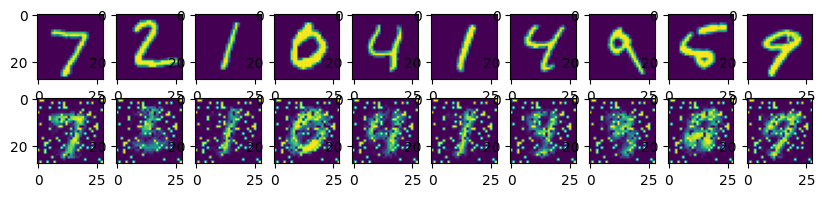

In [22]:
reconstruckes_result = AutoEncoder_model(x_test[:examples_to_show])
f, a = plt.subplots(2, 10, figsize=(10, 2))

for i in range(examples_to_show):
  a[0][i].imshow(np.reshape(x_test[i], (28,28)))
  a[1][i].imshow(np.reshape(reconstruckes_result[i], (28,28)))

f.savefig('reconstruckes_result_mnist_image.png')
f.show()